In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion
%pylab inline
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


# Практика проверки гипотез
## Стресс на работе. Достигаемый уровень значимости
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.
### Ответ
Нулевая гипотеза - стресс не влияет на личную жизнь.
Альтернативная гипотеза двусторонняя - стресс влияет на личную жизнь:
- уровень стресса отличается в меньшую сторону
- уровень стресса отличается в большую сторону.

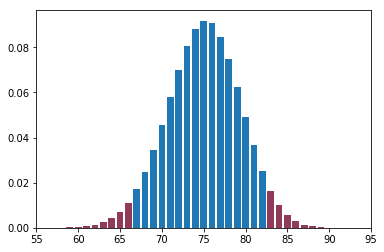

In [2]:
n = 100
delta = 20
median = 75
F_H0 = sp.stats.binom(n, 0.75)
x = np.linspace(0, n, n + 1)
n_current = 67

pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.arange(0, n_current), F_H0.pmf(np.arange(0, n_current)), align = 'center', alpha = 0.5, color='red')
pylab.bar(np.arange(2*median - n_current, n), F_H0.pmf(np.arange(2*median - n_current, n)), align = 'center', alpha = 0.5, color='red')

xlim(median - delta, median + delta) 
pylab.show()

In [3]:
np.round(sp.stats.binom_test(n_current, n, 0.75, alternative = 'two-sided'), 4)

0.0822

## Стресс на работе. Интерпретация результатов
Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

- Сотрудники чрезмерно оптимистично отвечали на вопрос, потому что опрос не был анонимным +


- Эта сеть менее популярна, поэтому в её ресторанах меньше поток посетителей; отсюда меньший уровень стресса у работников


- Сеть известна низкими зарплатами и большой текучкой кадров, поэтому туда идут работать люди, не склонные переживать о сохранении рабочего места


- Условия работы в этой сети лучше, чем в среднем


In [4]:
n_stress = 22
n = 50
percent = 0.75

np.round(sp.stats.binom_test(n_stress, n, percent, alternative = 'two-sided'), 4)

0.0

## Лес. Равномерное распределение
The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [5]:
df = pd.read_csv('pines.txt', header = 0, sep = '\t')
df.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [6]:
x = df['sn']
y = df['we']
binx = np.arange(0, 201, 40)
biny = np.arange(0, 201, 40)
ret = sp.stats.binned_statistic_2d(x, y, x, 'count', bins=[binx,biny])

In [7]:
value = len(x)/(len(binx[:-1])*len(biny[:-1]))
print(value)

23.36


## Лес. Проверяем гипотезу о равномерности сосен с помощью Хи-квадрат
Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [8]:
ret.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [9]:
observed_frequences = ret.statistic.flatten()

In [10]:
expected_frequences = [value] * len(observed_frequences)

In [11]:
result = sp.stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

In [12]:
np.round(result.statistic, 2)

150.59

##  Лес. Достигаемый уровень значимости
Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с $25−1=24$ степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы $K−1$, где $K$ — количество интервалов).

Посчитайте достигаемый уровень значимости.

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

In [13]:
result = sp.stats.chisquare(observed_frequences, expected_frequences, ddof = 0)

In [14]:
result.pvalue

2.574669774967279e-20

Достигаемый уровень значимости меньше 0.05 - нулевая гипотеза отклоняется.

## Результат
Был закреплен материал из лекций. И заодно стал более внимательно относиться к округлениям)